In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # 常用的 DataFrame 操作
 * merge / transform
 * subset
 * groupby

In [2]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

get_ipython().magic('matplotlib inline')



In [3]:
# 設定 data_path
dir_data = './data/'


In [4]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)


Path of read in data: ./data/application_train.csv


 ## 作業
 1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，
   並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
     * 0 個小孩
     * 有 1 - 2 個小孩
     * 有 3 - 5 個小孩
     * 有超過 5 個小孩

 2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
 3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [5]:
# play around with pd.cut
pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3)
pd.cut(np.array([1, 7, 5, 4, 6, 3]), [0,3,7])
pd.cut(np.array([1, 7, 5, 4, 6, 3]), [0,3,7], False)


[[0, 3), NaN, [3, 7), [3, 7), [3, 7), [3, 7)]
Categories (2, interval[int64]): [[0, 3) < [3, 7)]

In [6]:
#1
cut_rule = [-0.1, 0, 2, 5, float("inf")]
labels = ["a","b","c","d"]
app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True, labels=labels)
app_train['CNT_CHILDREN_GROUP'].value_counts()



a    215371
b     87868
c      4230
d        42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [7]:
#2-1
grp = ['CNT_CHILDREN_GROUP']
grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()



CNT_CHILDREN_GROUP
a    166288.713566
b    174725.712648
c    173626.303191
d    147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

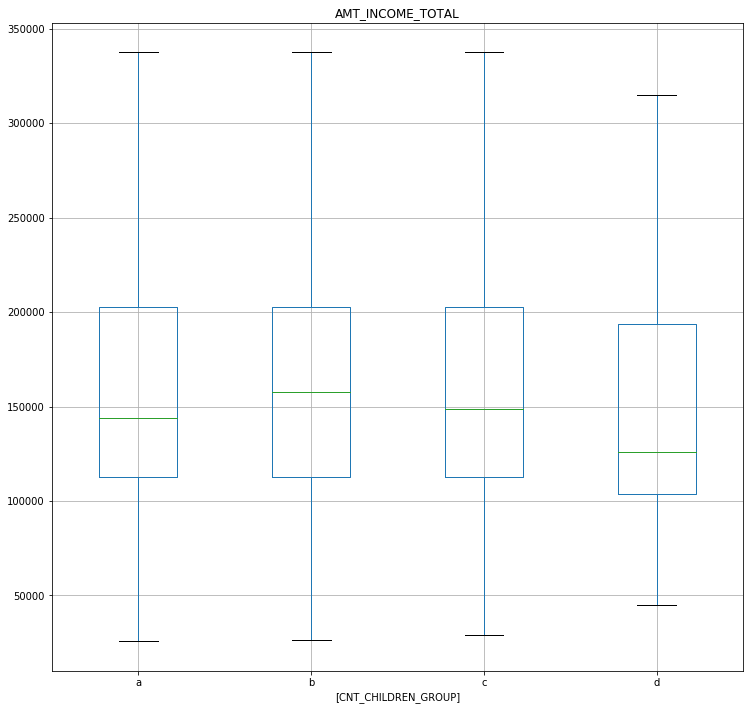

In [8]:
#2-2
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP']

app_train.boxplot(column=plt_column, by = plt_by, 
        showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()



In [9]:
#3
data_mean = app_train['AMT_INCOME_TOTAL'].mean()
data_std = app_train['AMT_INCOME_TOTAL'].std()
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-data_mean)/data_std)
app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()




,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.142129
1,270000.0,0.426791
2,67500.0,-0.427195
3,135000.0,-0.142533
4,121500.0,-0.199466
